# **Random Diffusion in 2D**

<i class="fa fa-home fa-2x"></i><a href="../index.ipynb" style="font-size: 20px"> Go back to index</a>

**Source code:** https://github.com/osscar-org/quantum-mechanics/blob/develop/notebook/quantum-mechanics/diffusion-from-random-2d.ipynb

<hr style="height:1px;border:none;color:#cccccc;background-color:#cccccc;" />

## Goals

* Understand random diffusion process in two dimension
* Learn how to calculate diffusion coefficient from $r^2$
* Understand the connection between microscopic kinetics and macro observable

## Background theory

<details close>
<summary style="font-size: 20px"><b>Random walk</b></summary>
Random walk is mathematical concept describing a path composed of succession of random steps in certain space. A specific case of random walk is Brownian motion, which is a type of diffusion model. Although each step is random, we can study the path in a statistically standpoint thus creating a possibility to connect microscopic behavior with macroscopic observation.

According to Fick's laws of diffusion, the mean squared displacement from Brownian motion is given by:
$$\text{MSD} = \langle(x-x_0)^2 \rangle = 2nDt \quad (1)$$
where n is the dimension of Brownian motion and D is the diffusion coefficient. The square root of MSD indicates how far the particle has drift away after time t, which is why we define $r_{\text{std}}=\sqrt{\text{MSD}}$
</details>

<details close>
<summary style="font-size: 20px"><b>Normal distribution</b></summary>
Normal distribution or Gaussian distribution is a continuous probability distribution in real space. The density function is given by:

$$f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \exp(-\frac 1 2 (\frac {x - \mu}{\sigma})) \quad (2)$$

where $\sigma$ is the standard deviation of x and $\mu$ is the mean.
In the case of 1-D random walk, we have:
$$\mu = \langle x \rangle = Nl(2q - 1) \quad (3)$$
$$\sigma^2 = 4Nl^2q(1-q) \quad (4)$$
where N is the number of total steps, l is the step size and q is the possibility of to go in positive or negative direction.
From equation (3) and (4), we can define the standard distance for a random diffusion after step N for unbiased random walk (q = 0.5):
$$d_{std} = \sqrt{\sigma^2 + \mu^2} = l \sqrt{N} \quad (5)$$ 
</details>
    

## **Tasks and exercises**

1. Click run button and play the random walk simulation. Compare the global behavior and the path of an individual point, what do you observe? (The individual path will be shown when the "show trajectory" box is checked.)
<details>
<summary>Hints</summary>
The individual path is random, which is physically a Brownian motion since all particles have constant kinetic energy.
The global behavior, however, shows a uniform spherical pattern, where the radius corresponds to xxxxxx (most probable place of ) 
<br>
</details>

2. What statistical distribution should the diffusion pattern obey? See if the red analytical curve drawn in the plot agrees with you.
<details>
<summary>Hints</summary>
Brownian motion will obey normal distribution. Note that in plot 2, $G(r)r$ is shown where G(r) is the normal probability density function and r denotes the distance to center which comes from the integration of probability density in sphereical coordinates i.e. $\int_0^{2\pi} d\theta \int_0^r rdr G(r) =1$ 
</details>  


3. How can the diffusion coefficient, D,  be obtained from the global pattern observed?
<details>
<summary>Hints</summary><br>
Combining equation (1) and (5), the microscopic step size of random walk $l$ is connected with the macroscopic diffusion coefficient, D.

</details>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import ipywidgets as ipw
%matplotlib widget
# %matplotlib inline
# plt.rcParams['figure.autolayout'] = 'True' # turn on tight layout globally

In [2]:
N = 1000
box_xrange = (-10, 10)
box_yrange = (-10, 10)
starting_radius = 0.1
num_steps = 10000
radius_factor = 2 # arbitray factor on mean radius, may need to change later
r = np.linspace(0,10,100)

In [3]:
layout = ipw.Layout(width='auto', height='30px')

# func_drpdwn = ipw.Dropdown(options=['Continuous', 'Discrete'], value='Discrete', description='Random walk type', disabled=False, layout=layout) # continuous or discrete step
ndots_slider = ipw.IntSlider(value=5000, min=1, max=10000, step=100, description='Number of points', style= {'description_width': 'initial'}, layout=layout) # number of points
stepsize_slider = ipw.FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='Step size', continuous_update=False, readout=True, readout_format='.2f', style= {'description_width': 'initial'}, layout=layout) # max step size
frame_slider = ipw.IntSlider(value=0, min=0, max=num_steps, step=100, description='Frame index', continuous_update=False, readout=True, disabled=True, style= {'description_width': 'initial'}, layout=layout) # step index indicator and slider
nsteps_slider = ipw.IntSlider(value=10000, min=100, max=20000, step=100, description='Number of steps', continuous_update=False, disabled=False, style= {'description_width': 'initial'}, layout=layout)

traj_chkbox = ipw.Checkbox(value=False,description='Show trajectory', disabled=False, indent=False)
map_chkbox = ipw.Checkbox(value=False,description='Show density map', disabled=False, indent=False)

run_btn = ipw.Button(description='Run')
run_btn.style.button_color = 'green'
play = ipw.Play(value=0, min=0, max=num_steps, step=100, disabled=True, interval=500) # iterate frame with 500ms interval

In [5]:
# # define layout by gridspec
# fig = plt.figure(constrained_layout=True, figsize=(7, 6))
# gs = fig.add_gridspec(4,4)
# ax1 = fig.add_subplot(gs[0:2,0:2])
# ax2 = fig.add_subplot(gs[0:2,2:])
# # # ax3 = fig.add_subplot(gs[-1,0:2])
# ax3 = fig.add_subplot(gs[2:,2:])


trajectory =[] # trajectory of all dots
r_gr = []
frame_coords = 0
def plot_dots_circle(ax):
    show_traj = traj_chkbox.value
    show_map = map_chkbox.value
    frame_idx = frame_slider.value
    # radius_factor = 2
#     radius = np.array(frame_coords).std(axis=0).mean() * radius_factor
    radius = np.sqrt(frame_idx) * stepsize_slider.value # std_radius = sqrt(N) * stepsize
    frame_coords = trajectory[frame_idx]

    ax.clear()
    ax.set_xlim(box_xrange)
    ax.set_ylim(box_yrange)
    ticks_ax1 = [-10., -5., 0., 5., 10]
    ax.xaxis.set_ticks(ticks_ax1)
    ax.yaxis.set_ticks(ticks_ax1)
    ax.set_aspect(1.)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # draw dots  
    ax.plot(frame_coords[:,0], frame_coords[:,1], '.', alpha=0.1, zorder=11)
    # draw circle
    circle = plt.Circle((0, 0), radius, color='r', fill=False, linestyle='dashed',zorder=12, label='$r_{std}$')
    ax1.add_patch(circle)
    # draw trajectory of first dots
    if show_traj:
        ax.plot(trajectory[:frame_idx:100,0,0], trajectory[:frame_idx:100,0,1], linewidth=2, color='purple', zorder=13, label='trajectory')

    if show_map:
        x = np.linspace(-10, 10, 30)
        y = np.linspace(-10, 10, 30)
        N = frame_idx
        l = stepsize_slider.value
        gx = gaussian_1d(x, N, l)
        gy = gaussian_1d(y, N, l)
        H = np.ma.outerproduct(gx, gy).data
        ax.imshow(H, origin='lower', interpolation='none', extent=[box_xrange[0], box_xrange[1], box_yrange[0], box_yrange[1]],aspect='equal', alpha=0.7, cmap='Oranges')
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1.05))
    
def plot_2dhist(ax, frame_idx):
    '''plot 2d histogram for dots diffusion'''
    ax.clear()
    x_coords = trajectory[frame_idx,:,0]
    y_coords = trajectory[frame_idx,:,1]
    H, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=10, range= [[box_xrange[0], box_xrange[1]], [box_yrange[0], box_yrange[1]]], density=False) # compute histogram
    H = H.T

    ax.imshow(H, origin='lower', interpolation='bicubic', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
#     no interpolation
#     ax.imshow(H, origin='lower', interpolation='nearest', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])

#     a different method
#         im = mpl.image.NonUniformImage(ax, interpolation='bilinear')
#         x_centers = (x_edges[:-1] + x_edges[1:]) / 2
#         y_centers = (y_edges[:-1] + y_edges[1:]) / 2
#         im.set_data(x_centers, y_centers, H)
    ax.set_xlim(x_edges[[0,-1]])
    ax.set_ylim(y_edges[[0,-1]])

def plot_gaussian_2d(ax, frame_idx):
    '''return analytical Gaussian density map for the diffusion plot as a comparison for the actual simulation'''
    ax.clear()
    x = np.linspace(-10, 10, 30)
    y = np.linspace(-10, 10, 30)
    N = frame_idx
    l = stepsize_slider.value
    gx = gaussian_1d(x, N, l)
    gy = gaussian_1d(y, N, l)
    H = np.ma.outerproduct(gx, gy).data
    
    im = ax.imshow(H, origin='lower', interpolation='none', extent=[x[0], x[-1], y[0], y[-1]],aspect='equal', alpha=0.7, cmap='Oranges')
    return im

def gaussian_sphereical(x, N, l):
    '''Gaussian in spehreical, i.e. r * G(r)'''
    if N == 0:
        return np.zeros(len(x))
    var =2 * N * l**2 # stepsize is sqrt(2) * l
    return x * (1 / np.sqrt(2 * np.pi * var)) * np.exp(-x**2/ (2 * var))
#     return 2* np.pi * (1 / np.sqrt(2 * np.pi * std_sq)) * np.exp(-x**2/ (2 * std_sq))

def gaussian_1d(x, N, l):
    if N == 0:
        return np.zeros(len(x)) # for simplicity of visualization, zeros is returned instead of a Dirac distribution
    var = N * l**2
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-x**2/ (2 * var)) / (2 * np.pi)

def plot_circle_hist(ax):
    global gs_line
    frame_idx = frame_slider.value
    N = ndots_slider.value
    stepsize = stepsize_slider.value
    frame_coords = trajectory[frame_idx]
    radii = np.sqrt((frame_coords**2).sum(axis=1))
#     hist_data, hist_x = ax.hist(radii, bins=30)
#     hist_coords = np.concatenate([np.array(list(zip(hist_x[:-1], hist_data))), np.array(list(zip(hist_x[1:], hist_data)))])
#     hist_coords = hist_coords[hist_coords[:, 0].argsort(), :]
#     ax.plot(hist_coords[:, 0], hist_coords[:, 1])
    nbins = 30
    x_range = (0,10)
    bin_width = (x_range[1] - x_range[0]) / nbins
    hist, bins= np.histogram(radii, bins=30, range=(0,10), density=False)
    hist  = hist / N * bins[1:] # histunt/ total dots * r  to get r*f(r) which is the probability of finding dots at radius r

    h_offset =  0.5 * bin_width # horizontal offset for histogram plot so the first column starts at 0
    r = np.linspace(x_range[0], x_range[1], 100)
    r_gr = gaussian_sphereical(r, frame_idx, stepsize)
    ax.clear()
    ax.set_xlim(0,10)
    #     ax.set_ylim(0,1)
    ax.set_xlabel("distance from centre")
    ax.set_ylabel("frequency")
    ax.bar(bins[:-1]+h_offset, hist, ec='k', width=bin_width)
    ax.plot(r, r_gr, 'r--', label='Gaussian distribution')
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1.05))
#     gs_line.set_data(r, r_gr)

def plot_1d_hist(ax):
    frame_idx = frame_slider.value
    N = ndots_slider.value
    stepsize = stepsize_slider.value
    x_coords = trajectory[frame_idx][:,0]
#     hist_data, hist_x = ax.hist(radii, bins=30)
#     hist_coords = np.concatenate([np.array(list(zip(hist_x[:-1], hist_data))), np.array(list(zip(hist_x[1:], hist_data)))])
#     hist_coords = hist_coords[hist_coords[:, 0].argsort(), :]
#     ax.plot(hist_coords[:, 0], hist_coords[:, 1])
    nbins = 30
    x_range = (0,10)
    bin_width = (x_range[1] - x_range[0]) / nbins
    hist, bins= np.histogram(x_coords, bins=30, range=(0,10), density=False)
    
#     hist =  hist / (2 * np.pi * bins[1:] * bin_width) / N # normalized count by count/ bin area/ total dots = count/ (2* pi* r*dr) / N
    hist = hist / (bin_width * N) # normalized count by count/ (N * width) to get f(r)
    h_offset =  0.5 * bin_width # horizontal offset for histogram plot so the first column starts at 0
    r = np.linspace(x_range[0], x_range[1], 100)
    gr = gaussian_1d(r, frame_idx, stepsize)
    ax.clear()
    ax.set_xlim(0,10)
    #     ax.set_ylim(0,1)
    ax.set_xlabel("distance from centre")
    ax.set_ylabel("frequency")
    ax.bar(bins[:-1]+h_offset, hist, ec='k', width=bin_width)
    ax.plot(r, gr, 'r--',label='Gaussian distribution')
    ax.legend(loc='lower right', bbox_to_anchor=(1, 1.05))

def plot_radii(ax):
    frame_idx = frame_slider.value
    times = []
    std_radius = []
    ax.clear()
    # Do std-deviation for both x and y coords, at each timestep (axis=1 means on all points for that step)
    # then do mean on second axis, meaning (x_std + y_std)/2 at each timestep
    std_radius = np.array(trajectory).std(axis=1).mean(axis=1)

    ax.plot(std_radius**2) # mind this arbitray coeffcient
    ax.plot(frame_idx, std_radius[frame_idx]**2, 'ro', label='current step')
    ax.set_xlabel('time step')
    ax.set_ylabel('$r_{std}^2$')
    ax.legend(loc='best')

def plot_frame(change):
    ''' plot current frame for all axis'''
    if frame_slider.value == 0:
        return
    # plot 1
    plot_dots_circle(ax1)
    #plot 2
#     plot_circle_hist(ax2)
    plot_1d_hist(ax2)
    # plot 3
    plot_radii(ax3)

def run(change):
    '''Run diffusion simulation and enable the play button. Return trajectory of all dots. 
    '''
    global trajectory, r_gr
    # initial coords with a random radial distribution
    stepsize = stepsize_slider.value # mean stepsize
    coords = (np.random.random((10*N, 2)) - 0.5)*2 * stepsize # since the step is continuous stepsize =  mean absolute value of step size
    coords = coords[(coords**2).sum(axis=1) < stepsize**2][:N] # taking points in the circle 

    assert len(coords) == N # check if all points are in the circle ??why??

    # run simulation and store trajectory 
    trajectory = [coords]
    num_steps = nsteps_slider.value
    # discrete random walk or continuous walk
#     is_continuous = (func_drpdwn == 'Continuous')
    for i in range(num_steps):
#         random_displacement = (np.random.random((N, 2)) - 0.5) * 2 * stepsize # continuous
        random_displacement = (np.random.choice([-1,1],(N, 2)))  * stepsize # discrete
        new_positions = trajectory[-1] + random_displacement
        # Some points might have gone beyond the box.
        # I could either reflect them back as a hard wall, or just use PBC. For simplicity, I use PBC
        new_positions[:,0] = (new_positions[:,0] - box_xrange[0]) % (box_xrange[1] - box_xrange[0]) + box_xrange[0]
        new_positions[:,1] = (new_positions[:,1] - box_yrange[0]) % (box_yrange[1] - box_yrange[0]) + box_yrange[0]    
        trajectory.append(new_positions)
    trajectory = np.array(trajectory)
    # enable play and frame slider after the simulation run
    play.disabled = False
    frame_slider.disabled = False
    return trajectory

def stop(change):
    ''' disable play widget and reset frame slider'''
    global dots_art, traj_art, circle
    play.disabled = True
    frame_slider.value = 0
    # reset all the axes
    
    for ax in [ax1, ax2, ax3]:
        ax.clear()
    initialize_plot()

def initialize_plot():
    global ax1, ax2, ax3
    ax = ax1
    ax.set_xlim(box_xrange)
    ax.set_ylim(box_yrange)
    ticks_ax1 = [-10., -5., 0., 5., 10]
    ax.xaxis.set_ticks(ticks_ax1)
    ax.yaxis.set_ticks(ticks_ax1)
    ax.set_aspect(1.)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax = ax2
    ax.set_xlim(0,10)
    #     ax.set_ylim(0,1)
#     ax.set_aspect(1.1)
    ax.set_xlabel("distance from centre")
    ax.set_ylabel("frequency")
    
    ax = ax3
#     ax.set_xlim()
    ax.set_xlabel('time step')
    ax.set_ylabel('$r_{std}^2$')

# link widgets
ipw.jslink((play, 'value'), (frame_slider, 'value'))
ipw.jslink((nsteps_slider, 'value'), (frame_slider,'max'))
frame_slider.observe(plot_frame, names='value', type='change')
# click run for simmulation and collect trajectory
run_btn.on_click(run)

# change simulation parameters will disable play and frame slider until finish run
ndots_slider.observe(stop, names='value', type='change')
stepsize_slider.observe(stop, names='value', type='change')
nsteps_slider.observe(stop, names='value', type='change')
# traj_chkbox.observe(stop, names='value', type='change')
# map_chkbox.observe(stop,names='vale', type='change')



control_wdgt = ipw.VBox([ndots_slider, stepsize_slider, nsteps_slider, traj_chkbox, map_chkbox, frame_slider])
play_wdgt = ipw.HBox([run_btn, play])
all_widgets = ipw.VBox([control_wdgt, play_wdgt])


# use Output to wrap the plot
plotup_out = ipw.Output()
frame_idx = 0
with plotup_out:
    fig, (ax1,ax2) = plt.subplots(1,2,constrained_layout=True, figsize=(6,3))

#     frame_coords = trajectory[frame_idx]
#     radii = np.sqrt((frame_coords**2).sum(axis=1))
#     hist, bins= np.histogram(radii, bins=30, density=False)
#     bin_width = bins[1] - bins[0]
#     h_offset =  0.5 * bin_width
#     bars = ax.bar(bins[:-1]+h_offset, hist, ec='k', width=bin_width)
    # gs_line, = ax.plot([0],[0], 'r--', label='Gaussian distribution')
    # ax.legend()
#     trajectory= run(None)
plotdwn_out = ipw.Output()

with plotdwn_out:
    fig, ax3 = plt.subplots(constrained_layout=True, figsize=(3,2))
initialize_plot()
display(ipw.VBox([ipw.HBox([plotup_out]), ipw.HBox([all_widgets, plotdwn_out])]))


In [14]:
stepsize = 3
random_displacement = (np.random.choice([-1,1],(N, 2)))  * stepsize
random_displacement

array([[-3,  3],
       [-3,  3],
       [ 3,  3],
       ...,
       [ 3, -3],
       [-3,  3],
       [-3,  3]])

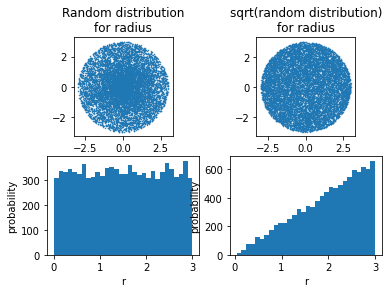

In [4]:
import numpy.random as rnd
import numpy as np
import pylab as pl

R = 3
N = 10000

# Random angles between 0 and 2*pi
phi = rnd.rand(N) * 2 * np.pi
# Random radius between 0 and R
r = rnd.rand(N) * R
# Convert to (x,y) Cartesian coords
x = r * np.cos(phi)
y = r * np.sin(phi)

#Plotting the points
#pts = np.array([x, y]).T
ax = pl.subplot(221)
pl.plot(x, y, '.', markersize=1)
ax.set_aspect('equal')
pl.xlabel('x')
pl.xlabel('y')
pl.title("Random distribution\nfor radius")

ax = pl.subplot(223)
pl.hist(r, bins=30)
pl.xlabel('r')
pl.ylabel('probability')

# Random angles between 0 and 2*pi
phi = rnd.rand(N) * 2 * np.pi
# Random radius between 0 and R
r = np.sqrt(rnd.rand(N)) * R
# Convert to (x,y) Cartesian coords
x = r * np.cos(phi)
y = r * np.sin(phi)

ax = pl.subplot(222)
pl.plot(x, y, '.', markersize=1)
ax.set_aspect('equal')
pl.xlabel('x')
pl.xlabel('y')
pl.title("sqrt(random distribution)\nfor radius")


ax = pl.subplot(224)
pl.hist(r, bins=30)
pl.xlabel('r')
pl.ylabel('probability')

pl.show()

In [5]:
# import ipywidgets as ipw

# fig = plt.figure(figsize=(7,6))
# @ipw.interact(
#     frame_idx=ipw.IntSlider(description='Frame', min=0, max=num_steps-1, value=0, continuous_update=False)
# )
# def plot(frame_idx):
#     frame_coords = trajectory[frame_idx]
#     plt.plot(frame_coords[:,0], frame_coords[:,1], '.')
    
#     std_radius = np.array(frame_coords).std(axis=0).mean()
#     circle = plt.Circle((0, 0), 2*std_radius, color='b', fill=False)
#     ax1.add_patch(circle)
    

#     ax1.set_aspect(1.)

#     x_coords = trajectory[frame_idx,:,0]
#     y_coords = trajectory[frame_idx,:,1]
#     H, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=10, range= [[box_xrange[0], box_xrange[1]], [box_yrange[0], box_yrange[1]]], density=False) # compute histogram
#     H = H.T
#     ax2 = fig.add_subplot(1,3,2, sharex=ax1, sharey=ax1)
#     plt.imshow(H, origin='lower', interpolation='nearest', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
    
#     ax3 = fig.add_subplot(1,3,3, sharex=ax1, sharey=ax1, aspect='equal', xlim=x_edges[[0,-1]], ylim=y_edges[[0,-1]])
# #     im = mpl.image.NonUniformImage(ax, interpolation='bilinear')
# #     x_centers = (x_edges[:-1] + x_edges[1:]) / 2
# #     y_centers = (y_edges[:-1] + y_edges[1:]) / 2
# #     im.set_data(x_centers, y_centers, H)
#     plt.imshow(H, origin='lower', interpolation='bicubic', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
#     ax1.set_xlim(box_xrange)
#     ax1.set_ylim(box_yrange)
#     plt.show()
    
    
    

In [20]:
# # Run simulations
# import tqdm
# num_steps = 10000
# random_step=0.1

# trajectory = [coords]
# for i in tqdm.tqdm(range(num_steps)):
#     random_displacement = (np.random.random((N, 2)) - 0.5)*2 * random_step
#     new_positions = trajectory[-1] + random_displacement
#     # Some points might have gone beyond the box.
#     # I could either reflect them back as a hard wall, or just use PBC. For simplicity, I use PBC
#     new_positions[:,0] = (new_positions[:,0] - box_xrange[0]) % (box_xrange[1] - box_xrange[0]) + box_xrange[0]
#     new_positions[:,1] = (new_positions[:,1] - box_yrange[0]) % (box_yrange[1] - box_yrange[0]) + box_yrange[0]    
#     trajectory.append(new_positions)

# trajectory = np.array(trajectory)

In [16]:
# from matplotlib import animation

# fps = 25
# video_length_seconds = 10.
# num_video_frames = int(fps*video_length_seconds)

# fig_movie = pl.figure(figsize=(10,10))
# ax = pl.subplot(1,1,1)
# points_plot = pl.plot(trajectory[0][:,0], trajectory[0][:,1], '.')
# circle = pl.Circle((0, 0), 0., color='b', fill=False)
# ax.add_patch(circle)
# pl.xlim(box_xrange)
# pl.ylim(box_yrange)
# ax.set_aspect(1.)

# def update_frame(frame_idx):
#     global trajectory, points_plot, num_video_frames, num_steps, circle
    
#     trajectory_idx = frame_idx * (num_steps // num_video_frames)    
#     frame_coords = trajectory[trajectory_idx]
#     points_plot[0].set_data(frame_coords.T)

#     std_radius = np.array(frame_coords).std(axis=0).mean()
#     circle.set_radius(2*std_radius)
    
#     return points_plot[0], circle

# line_ani = animation.FuncAnimation(fig_movie, update_frame, frames=num_video_frames, blit=True)
# line_ani.save('diffusion.mp4', fps=fps)

In [17]:
# run(None)
# plt.figure()


# for frame_idx in [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9999]:
#     frame_coords = trajectory[frame_idx]
#     radii = np.sqrt((frame_coords**2).sum(axis=1))
#     hist_data, hist_x = np.histogram(radii, bins=30)
#     hist_coords = np.concatenate([np.array(list(zip(hist_x[:-1], hist_data))), np.array(list(zip(hist_x[1:], hist_data)))])
#     hist_coords = hist_coords[hist_coords[:, 0].argsort(), :]
#     plt.plot(hist_coords[:, 0], hist_coords[:, 1])
# plt.xlim(0, 10)
# plt.xlabel("distance from centre")
# plt.ylabel("frequency")
# plt.show()

In [18]:
import pylab as pl
times = []
std_radius = []

pl.figure(figsize=(10,7))

# Do std-deviation for both x and y coords, at each timestep (axis=1 means on all points for that step)
# then do mean on second axis, meaning (x_std + y_std)/2 at each timestep
std_radius = np.array(trajectory).std(axis=1).mean(axis=1)
# TWICE the radius (to match the video)
pl.plot(2*std_radius)

## SLOWER VERSION
#for frame_idx, frame_coords in enumerate(tqdm.tqdm(trajectory)):
#    x_std = frame_coords[:, 0].std()
#    y_std = frame_coords[:, 1].std()
#    std = (x_std + y_std)/2.
#    times.append(frame_idx)
#    std_radius.append(std)
#pl.plot(times, std_radius)

pl.xlabel('time')
pl.ylabel('average radius')
pl.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
# test_play = ipw.Play(value=0, min=0, max=10, step=1, disabled=True)
# test_slider = ipw.IntSlider(value=0, min=0, max=10, step=1, disabled=True)
# ipw.jslink((test_play, 'value'), (test_slider, 'value'))
# test_chkbox = ipw.Checkbox(value=False, description='enable play')
# display(ipw.VBox([test_play, test_slider,test_chkbox]))
# def enable(change):
#     if test_chkbox.value:
#         test_play.disabled=False
#         test_slider.disabled=False
#     else:
#         test_play.disabled=True
#         test_slider.value=0
#         test_slider.disabled=True

# plot_f(None)
# test_chkbox.observe(enable, names='value', type='change')

In [ ]:
def plot_radii(ax, frame_idx):
    times = []
    std_radius = []
    ax.clear()
    # Do std-deviation for both x and y coords, at each timestep (axis=1 means on all points for that step)
    # then do mean on second axis, meaning (x_std + y_std)/2 at each timestep
    std_radius = np.array(trajectory).std(axis=1).mean(axis=1)

    ax.plot(std_radius)
    ax.plot(frame_idx, std_radius[frame_idx], 'ro', label='current frame')
    ax.set_xlabel('time frame')
    ax.set_ylabel('$r_{\text{std}}^2$')
    ax.legend()

fig, ax = plt.subplots()

run(None)
plot_radii(ax, 3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

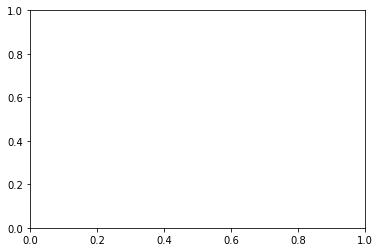

In [9]:
# x = np.random.randint(0,11,size=100)
x = np.linspace(0,10, 100)
hist, bins = np.histogram(x, bins=10, density=False)
bin_width = bins[1] - bins[0]
h_offset =  0.5 * bin_width
# bars = plt.bar(bins[:-1]+h_offset, hist, ec='k', width=bin_width)
bars = plt.bar(bins[:-1]+h_offset, [])

for bar, h in zip(bars, np.arange(10)):
    bar.set_height(h)
plt.show()

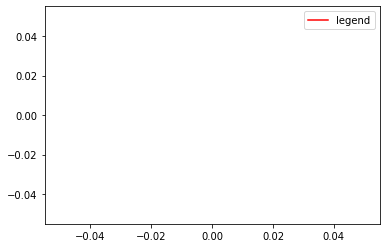

In [13]:
fig, ax = plt.subplots(1,1)
line, = ax.plot([],[],'r-',label='legend')
ax.legend()
plt.show()

In [15]:
line.set_data(np.linspace(0,10,100), np.random.randint(0,10,size=100))

plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
## import numpy as np
import matplotlib.pyplot as plt

plt.ion()       # Enable interactive mode
fig = plt.figure()  # Create figure
axes = fig.add_subplot(111) # Add subplot (dont worry only one plot appears)

axes.set_autoscale_on(True) # enable autoscale
axes.autoscale_view(True,True,True)

l, = plt.plot([], [], 'r-') # Plot blank data
plt.xlabel('x')         # Set up axes
plt.title('test')

k = 5
xdata=[0.5 for i in range(k+1)]     # Generate a list to hold data
ydata=[j for j in range(k+1)]

while True:
    y = float(input("y val :")) #Get new data
    xdata.append(y)     # Append new data to list
    k = k + 1       # inc x value
    ydata.append(k)
    l.set_data(ydata,xdata) # update data
    print(xdata)     # Print for debug perposes
    print(ydata)
    axes.relim()        # Recalculate limits
    axes.autoscale_view(True,True,True) #Autoscale
    plt.draw()      # Redraw
